In [1]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

In [2]:
def load_and_preprocess_image(img_path):
    image = np.array(Image.open(img_path).resize((100, 100))) / 255.0
    return image

def lr_schedule(epoch):
    lr = 0.0001
    if epoch > 10:
        lr *= 0.1
    elif epoch > 20:
        lr *= 0.01
    return lr

In [3]:
tops_images = ["Womens Surrealistic Themes Funny Summer Plus Size T-Shirts - 2 _ L.jpg", "Mens Astronaut Shooting Cartoon Print Crew Neck Short Sleeve T-Shirts - Khaki _ XL.jpg",
               "T-shirt Women Funny Cartoon Short Sleeve Streetwear - FuD 4127 bai _ M.jpg", "Breathable Solid Color round Neck Short Sleeve Cotton T-Shirts.jpg",
               "Vossiy Graphic Tees Men Fashion Print T-Shirts Unisex Cotton Tee Hipster Casual Streetwear Loose Summer Tee Top.jpg"]

bottoms_images = ["download (1).jpg","Women's Designer Denim _ Moda Operandi.jpg","Designer Wide-Leg Jeans for Women.jpg","Jacquemus Fashion Collections For Women _ Moda Operandi.jpg",
                 "download.jpg"]

In [4]:
labels = [0] * len(tops_images) + [1] * len(bottoms_images)

In [5]:
images_train, images_test, labels_train, labels_test = train_test_split(
    tops_images + bottoms_images, labels, test_size=0.2, random_state=42
)

images_train = np.array([load_and_preprocess_image(img) for img in images_train])
labels_train = np.array(labels_train, dtype=np.float32)

In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_train_data = []
for img, label in zip(images_train, labels_train):
    img_array = np.expand_dims(img, axis=0)
    augmented_images = [datagen.random_transform(img_array[0]) for _ in range(16)]
    augmented_train_data.extend([(augmented_image, label) for augmented_image in augmented_images])

augmented_train_data = np.array(augmented_train_data, dtype=object)
images_train_augmented = np.array([item[0] for item in augmented_train_data], dtype=np.float32)
labels_train_augmented = np.array([item[1] for item in augmented_train_data], dtype=np.float32)

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

NameError: name 'Adam' is not defined

In [18]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    LearningRateScheduler(lr_schedule)
]

In [17]:
history = model.fit(images_train_augmented, labels_train_augmented, 
                    epochs=30, batch_size=32, 
                    validation_split=0.2, callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 1s 242ms/step - loss: 0.0417 - accuracy: 0.9902 - val_loss: 0.6701 - val_accuracy: 0.8846 - lr: 1.0000e-04
Epoch 2/30
4/4 [==============================] - 1s 205ms/step - loss: 0.0697 - accuracy: 0.9902 - val_loss: 0.7066 - val_accuracy: 0.3846 - lr: 1.0000e-04
Epoch 3/30
4/4 [==============================] - 1s 226ms/step - loss: 0.0509 - accuracy: 1.0000 - val_loss: 0.7145 - val_accuracy: 0.3846 - lr: 1.0000e-04
Epoch 4/30
4/4 [==============================] - 1s 232ms/step - loss: 0.0222 - accuracy: 0.9902 - val_loss: 0.7323 - val_accuracy: 0.3846 - lr: 1.0000e-04
Epoch 5/30
4/4 [==============================] - 1s 248ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.8002 - val_accuracy: 0.3846 - lr: 1.0000e-04
Epoch 6/30
4/4 [==============================] - 1s 213ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.7389 - val_accuracy: 0.3846 - lr: 1.0000e-04


In [16]:
images_test = np.array([load_and_preprocess_image(img) for img in images_test])
labels_test = np.array(labels_test, dtype=np.float32)

test_loss, test_accuracy = model.evaluate(images_test, labels_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

AttributeError: 'numpy.ndarray' object has no attribute 'read'

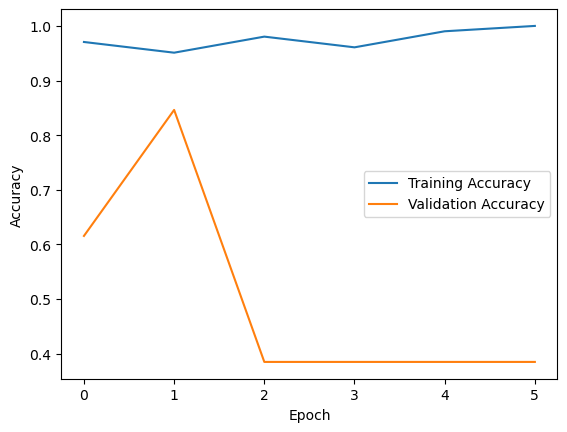

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()